In [10]:
import numpy as np
import pandas as pd
import csv
import datetime as dt

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("../../challenges_data/2013_movies.csv")
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


## CHALLENGE 1: Plot Domestic Total Gross over Time

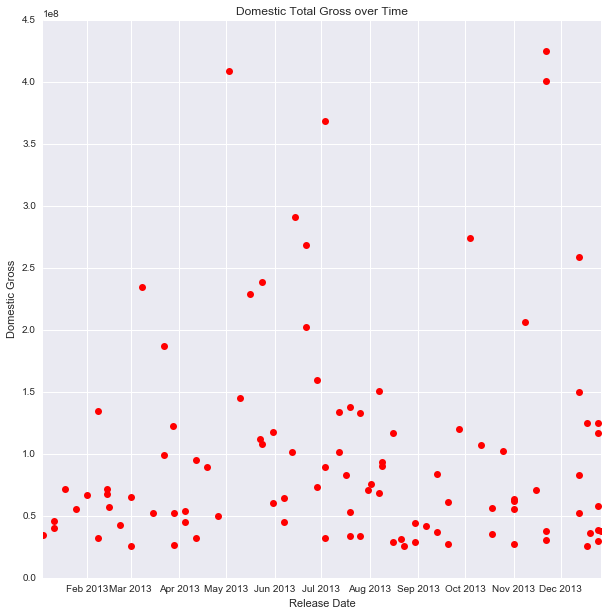

In [47]:
df["ReleaseDate"] = df.ReleaseDate.apply(lambda x: dt.datetime.strptime(x[:10], "%Y-%m-%d"))
plt.figure(figsize=(10,10))
plt.xlabel("Release Date")
plt.ylabel("Domestic Gross")
plt.title("Domestic Total Gross over Time")
plt.plot(df.ReleaseDate, df.DomesticTotalGross, 'ro')
#df["ReleaseDate"] = df.ReleaseDate.apply(lambda x: x[:10])
#dfGross = df.groupby("ReleaseDate").mean().reset_index().drop(["Budget","Runtime"], 1)
#sns.tsplot(data=dfGross)
#sns.tsplot(data=dfGross, time="ReleaseDate", value="DomesticTotalGross")
#sns.set_style("darkgrid", {"axes.facecolor": ".95"} )
#sns.tsplot(data=df, time="ReleaseDate", value="DomesticTotalGross")#, data= df, fit_reg=False, size=8, aspect=2)

## CHALLENGE 2: Plot Runtime vs. Domestic Total Gross

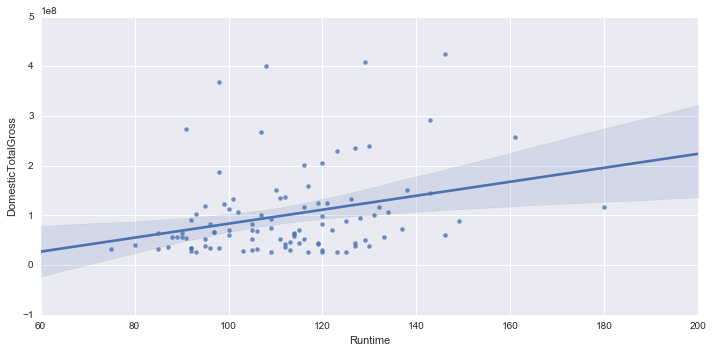

In [49]:
sns.lmplot("Runtime", "DomesticTotalGross", df, size=5, aspect=2)

## CHALLENGE 3: Group data by Rating, find average runtime and domestic total gross

In [8]:
dfRating = df.groupby("Rating").mean()
dfRating

,Budget,DomesticTotalGross,Runtime
Rating,,,
G,NaN,2.684928e+08,107.000000
PG,9.393333e+07,1.311357e+08,99.933333
PG-13,9.660976e+07,1.114498e+08,117.510638
R,3.886364e+07,6.989243e+07,110.729730


## CHALLENGE 4:
__Make one figure with (N=the number of MPAA ratings there are) subplots.  In each plot the release date vs. the domestic total gross.__

In [9]:
dfPG13 = df[df.Rating == "PG-13"]
dfPG13.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00


In [180]:
dfPG = df[df.Rating == "PG"]
dfPG.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08
13,The Croods,135000000.0,187168425,Kirk De MiccoChris Sanders,PG,98,2013-03-22
25,Cloudy with a Chance of Meatballs 2,78000000.0,119793567,NaN,PG,95,2013-09-27


In [185]:
dfR = df[df.Rating == "R"]
dfR.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
14,The Heat,43000000.0,159582188,Paul Feig,R,117,2013-06-28
15,We're the Millers,37000000.0,150394119,Rawson Marshall Thurber,R,110,2013-08-07
16,American Hustle,40000000.0,150117807,David O. Russell,R,138,2013-12-13
18,The Conjuring,20000000.0,137400141,James Wan,R,112,2013-07-19
19,Identity Thief,35000000.0,134506920,Seth Gordon,R,111,2013-02-08


In [186]:
dfG = df[df.Rating == "G"]
dfG.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21


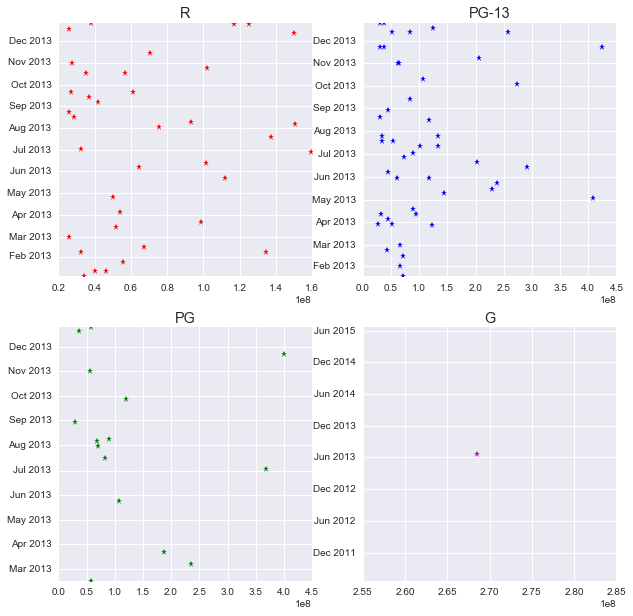

In [193]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.ylabel("Release Date")
plt.xlabel("Domestic Gross")

plt.subplot(221)
plt.title("R")
plt.plot(dfR.DomesticTotalGross, dfR.ReleaseDate, 'r*')

plt.subplot(222)
plt.title("PG-13")
plt.plot(dfPG13.DomesticTotalGross, dfPG13.ReleaseDate, 'b*')

plt.subplot(223)
plt.title("PG")
plt.plot(dfPG.DomesticTotalGross, dfPG.ReleaseDate, 'g*')

plt.subplot(224)
plt.title("G")
plt.plot(dfG.DomesticTotalGross, dfG.ReleaseDate, 'm*')

## CHALLENGE 5: What director in your dataset has the highest gross per movie?

In [270]:
dfDirector = df.groupby("Director").sum().sort_index()
dfDirector["NumFilms"] = df.Director.value_counts().sort_index()
dfDirector["GrossPerFilm"] = dfDirector.apply(lambda x: x.DomesticTotalGross/x.NumFilms, axis=1)
dfDirector.sort_values("GrossPerFilm", ascending=False).head(1)

,Budget,DomesticTotalGross,Runtime,NumFilms,GrossPerFilm
Director,,,,,
Francis Lawrence,130000000.0,424668047,146,1,424668047.0


## CHALLENGE 6: Bin  dataset into months, make bar graph of the mean total gross by month

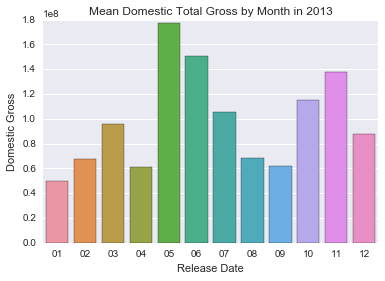

In [53]:
df["Month"] = df.ReleaseDate.apply(lambda x: str(x)[5:7])
dfMonths = df.groupby("Month").mean().drop(["Budget", "Runtime"], axis=1).reset_index()
plt.title("Mean Domestic Total Gross by Month in 2013")
barplot = sns.barplot(x="Month", y="DomesticTotalGross", data=dfMonths)
plt.xlabel("Month Released")
plt.ylabel("Mean Domestic Gross")